In [1]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
raw_data = pd.read_csv('preprocess_train.csv')
raw_data

,Unnamed: 0,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,fraud_ind
0,0,0.983295,0.994710,0.185962,0.014715,0.833333,0.826667,0.0,0.5,0.0,...,0.0,0.876404,0.521091,0.546841,0.755641,0.0,0.871983,0.953271,0.0,0.0
1,1,0.983004,0.447990,0.850985,0.000000,0.833333,0.826667,0.0,0.2,0.0,...,0.0,0.853933,0.937629,0.814815,0.197257,0.0,0.871983,0.953271,0.0,0.0
2,2,0.975596,0.151431,0.606322,0.086705,0.833333,0.826667,0.0,0.4,0.0,...,0.0,0.741573,0.769426,0.760349,0.983660,0.0,0.873782,0.953271,0.0,0.0
3,3,0.914003,0.372607,0.784460,0.109668,0.833333,0.826667,0.0,0.5,0.0,...,0.0,0.719101,0.872270,0.538126,0.371214,0.0,0.878129,0.953271,0.0,0.0
4,4,0.983004,0.375854,0.356005,0.156419,0.833333,0.826667,0.0,0.4,0.0,...,0.0,0.662921,0.865841,0.546841,0.171992,0.0,0.871983,0.953271,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896385,896385,0.465863,0.284081,0.866688,0.049981,0.833333,0.813333,1.0,0.8,0.0,...,0.0,1.000000,0.995338,0.559913,0.101813,0.0,0.218408,0.971963,0.5,1.0
896386,896386,0.950029,0.852462,0.627870,0.132293,0.833333,0.813333,1.0,0.2,0.0,...,0.0,1.000000,0.995965,0.627451,0.540205,0.0,0.986359,0.971963,0.0,1.0
896387,896387,0.950029,0.852462,0.627870,0.132353,0.833333,0.813333,1.0,0.2,0.0,...,0.0,1.000000,0.996071,0.627451,0.540205,0.0,0.986359,0.971963,0.0,1.0
896388,896388,0.939425,0.529786,0.498725,0.014095,0.666667,0.813333,1.0,0.2,0.0,...,0.0,1.000000,0.996529,0.697168,0.632426,0.0,0.224104,0.971963,0.0,1.0


In [3]:
raw_data = raw_data.drop(["Unnamed: 0"], 1)
raw_data

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,fraud_ind
0,0.983295,0.994710,0.185962,0.014715,0.833333,0.826667,0.0,0.5,0.0,0.0,...,0.0,0.876404,0.521091,0.546841,0.755641,0.0,0.871983,0.953271,0.0,0.0
1,0.983004,0.447990,0.850985,0.000000,0.833333,0.826667,0.0,0.2,0.0,0.0,...,0.0,0.853933,0.937629,0.814815,0.197257,0.0,0.871983,0.953271,0.0,0.0
2,0.975596,0.151431,0.606322,0.086705,0.833333,0.826667,0.0,0.4,0.0,0.0,...,0.0,0.741573,0.769426,0.760349,0.983660,0.0,0.873782,0.953271,0.0,0.0
3,0.914003,0.372607,0.784460,0.109668,0.833333,0.826667,0.0,0.5,0.0,0.0,...,0.0,0.719101,0.872270,0.538126,0.371214,0.0,0.878129,0.953271,0.0,0.0
4,0.983004,0.375854,0.356005,0.156419,0.833333,0.826667,0.0,0.4,0.0,0.0,...,0.0,0.662921,0.865841,0.546841,0.171992,0.0,0.871983,0.953271,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896385,0.465863,0.284081,0.866688,0.049981,0.833333,0.813333,1.0,0.8,0.0,0.0,...,0.0,1.000000,0.995338,0.559913,0.101813,0.0,0.218408,0.971963,0.5,1.0
896386,0.950029,0.852462,0.627870,0.132293,0.833333,0.813333,1.0,0.2,0.0,0.0,...,0.0,1.000000,0.995965,0.627451,0.540205,0.0,0.986359,0.971963,0.0,1.0
896387,0.950029,0.852462,0.627870,0.132353,0.833333,0.813333,1.0,0.2,0.0,0.0,...,0.0,1.000000,0.996071,0.627451,0.540205,0.0,0.986359,0.971963,0.0,1.0
896388,0.939425,0.529786,0.498725,0.014095,0.666667,0.813333,1.0,0.2,0.0,0.0,...,0.0,1.000000,0.996529,0.697168,0.632426,0.0,0.224104,0.971963,0.0,1.0


In [4]:
raw_data_y = raw_data[['fraud_ind']]

In [5]:
x_train,x_val,y_train,y_val = train_test_split(raw_data.drop("fraud_ind", 1),
                                               raw_data_y,
                                               test_size = 0.2)

In [6]:
#整合成Dataset

train_data = lgb.Dataset(x_train, label = y_train)

validation_data = lgb.Dataset(x_val, label = y_val)

In [7]:
params = {
'learning_rate': 0.03,
'feature_fraction': 0.7,
'bagging_fraction ': 0.8,
'lambda_l1': 0.1,
'lambda_l2': 0.2,
'max_depth': 50,
'num_leaves': 70,
'objective': 'binary', # 目標函式
}


In [8]:
#使用cross validation評價 model construction的 performance 
# cv_results = lgb.cv(params, train_data, num_boost_round=1000, nfold=5, stratified=False, shuffle=False, metrics='auc', seed=0, return_cvbooster=True)

In [9]:
# print('best n_estimators:', len(cv_results['auc-mean']))
# print('best cv score:', pd.Series(cv_results['auc-mean']).max())

In [10]:
# 訓練model 
eval_results={}
train_results = lgb.train(params, train_data, num_boost_round=1000,valid_sets=[train_data], valid_names=['train_data'],evals_result=eval_results)


[LightGBM] [Warning] Unknown parameter: 0.8
[LightGBM] [Warning] Unknown parameter: 0.8
[LightGBM] [Info] Number of positive: 12147, number of negative: 704965
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.141954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 717112, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016939 -> initscore=-4.061066
[LightGBM] [Info] Start training from score -4.061066
[1]	train_data's binary_logloss: 0.0749598
[2]	train_data's binary_logloss: 0.0709043
[3]	train_data's binary_logloss: 0.0676411
[4]	train_data's binary_logloss: 0.0649691
[5]	train_data's binary_logloss: 0.06272
[6]	train_data's binary_logloss: 0.060886
[7]	train_data's binary_logloss: 0.059244
[8]	train_data's binary_logloss: 0.0577569
[9]	train

[172]	train_data's binary_logloss: 0.0279508
[173]	train_data's binary_logloss: 0.0279209
[174]	train_data's binary_logloss: 0.027893
[175]	train_data's binary_logloss: 0.0278604
[176]	train_data's binary_logloss: 0.0278314
[177]	train_data's binary_logloss: 0.0277958
[178]	train_data's binary_logloss: 0.0277622
[179]	train_data's binary_logloss: 0.0277324
[180]	train_data's binary_logloss: 0.0277038
[181]	train_data's binary_logloss: 0.027676
[182]	train_data's binary_logloss: 0.0276457
[183]	train_data's binary_logloss: 0.0276038
[184]	train_data's binary_logloss: 0.0275647
[185]	train_data's binary_logloss: 0.0275428
[186]	train_data's binary_logloss: 0.0275141
[187]	train_data's binary_logloss: 0.0274833
[188]	train_data's binary_logloss: 0.0274531
[189]	train_data's binary_logloss: 0.0274284
[190]	train_data's binary_logloss: 0.0274018
[191]	train_data's binary_logloss: 0.0273698
[192]	train_data's binary_logloss: 0.0273385
[193]	train_data's binary_logloss: 0.0273062
[194]	train_

[356]	train_data's binary_logloss: 0.0238025
[357]	train_data's binary_logloss: 0.0237878
[358]	train_data's binary_logloss: 0.023767
[359]	train_data's binary_logloss: 0.0237534
[360]	train_data's binary_logloss: 0.023741
[361]	train_data's binary_logloss: 0.0237232
[362]	train_data's binary_logloss: 0.0237072
[363]	train_data's binary_logloss: 0.0236933
[364]	train_data's binary_logloss: 0.0236819
[365]	train_data's binary_logloss: 0.0236669
[366]	train_data's binary_logloss: 0.0236551
[367]	train_data's binary_logloss: 0.0236442
[368]	train_data's binary_logloss: 0.0236325
[369]	train_data's binary_logloss: 0.0236128
[370]	train_data's binary_logloss: 0.0235969
[371]	train_data's binary_logloss: 0.0235773
[372]	train_data's binary_logloss: 0.0235666
[373]	train_data's binary_logloss: 0.0235514
[374]	train_data's binary_logloss: 0.0235362
[375]	train_data's binary_logloss: 0.0235239
[376]	train_data's binary_logloss: 0.0235036
[377]	train_data's binary_logloss: 0.0234872
[378]	train_

[543]	train_data's binary_logloss: 0.0210807
[544]	train_data's binary_logloss: 0.0210624
[545]	train_data's binary_logloss: 0.0210554
[546]	train_data's binary_logloss: 0.0210436
[547]	train_data's binary_logloss: 0.0210366
[548]	train_data's binary_logloss: 0.0210186
[549]	train_data's binary_logloss: 0.0210109
[550]	train_data's binary_logloss: 0.0209972
[551]	train_data's binary_logloss: 0.0209803
[552]	train_data's binary_logloss: 0.0209611
[553]	train_data's binary_logloss: 0.0209435
[554]	train_data's binary_logloss: 0.0209289
[555]	train_data's binary_logloss: 0.0209156
[556]	train_data's binary_logloss: 0.0209029
[557]	train_data's binary_logloss: 0.0208933
[558]	train_data's binary_logloss: 0.0208823
[559]	train_data's binary_logloss: 0.0208609
[560]	train_data's binary_logloss: 0.0208487
[561]	train_data's binary_logloss: 0.0208417
[562]	train_data's binary_logloss: 0.0208223
[563]	train_data's binary_logloss: 0.0208058
[564]	train_data's binary_logloss: 0.0207904
[565]	trai

[728]	train_data's binary_logloss: 0.0188894
[729]	train_data's binary_logloss: 0.0188721
[730]	train_data's binary_logloss: 0.0188654
[731]	train_data's binary_logloss: 0.0188578
[732]	train_data's binary_logloss: 0.0188524
[733]	train_data's binary_logloss: 0.0188467
[734]	train_data's binary_logloss: 0.0188392
[735]	train_data's binary_logloss: 0.0188342
[736]	train_data's binary_logloss: 0.0188271
[737]	train_data's binary_logloss: 0.0188144
[738]	train_data's binary_logloss: 0.018802
[739]	train_data's binary_logloss: 0.0187969
[740]	train_data's binary_logloss: 0.0187876
[741]	train_data's binary_logloss: 0.0187817
[742]	train_data's binary_logloss: 0.0187627
[743]	train_data's binary_logloss: 0.0187572
[744]	train_data's binary_logloss: 0.0187512
[745]	train_data's binary_logloss: 0.0187389
[746]	train_data's binary_logloss: 0.0187296
[747]	train_data's binary_logloss: 0.0187248
[748]	train_data's binary_logloss: 0.0187121
[749]	train_data's binary_logloss: 0.0186997
[750]	train

[915]	train_data's binary_logloss: 0.0171535
[916]	train_data's binary_logloss: 0.0171499
[917]	train_data's binary_logloss: 0.01714
[918]	train_data's binary_logloss: 0.0171352
[919]	train_data's binary_logloss: 0.0171262
[920]	train_data's binary_logloss: 0.0171215
[921]	train_data's binary_logloss: 0.0171133
[922]	train_data's binary_logloss: 0.0171
[923]	train_data's binary_logloss: 0.0170943
[924]	train_data's binary_logloss: 0.017085
[925]	train_data's binary_logloss: 0.017075
[926]	train_data's binary_logloss: 0.0170671
[927]	train_data's binary_logloss: 0.0170634
[928]	train_data's binary_logloss: 0.0170571
[929]	train_data's binary_logloss: 0.0170471
[930]	train_data's binary_logloss: 0.0170357
[931]	train_data's binary_logloss: 0.0170313
[932]	train_data's binary_logloss: 0.0170256
[933]	train_data's binary_logloss: 0.0170218
[934]	train_data's binary_logloss: 0.0170104
[935]	train_data's binary_logloss: 0.0169959
[936]	train_data's binary_logloss: 0.016987
[937]	train_data's

In [11]:
#儲存 model
train_results.save_model('../ckpt/lightgbm_model_select01.txt')

<AxesSubplot:title={'center':'Split value histogram for feature with name bacno'}, xlabel='Feature split value', ylabel='Count'>

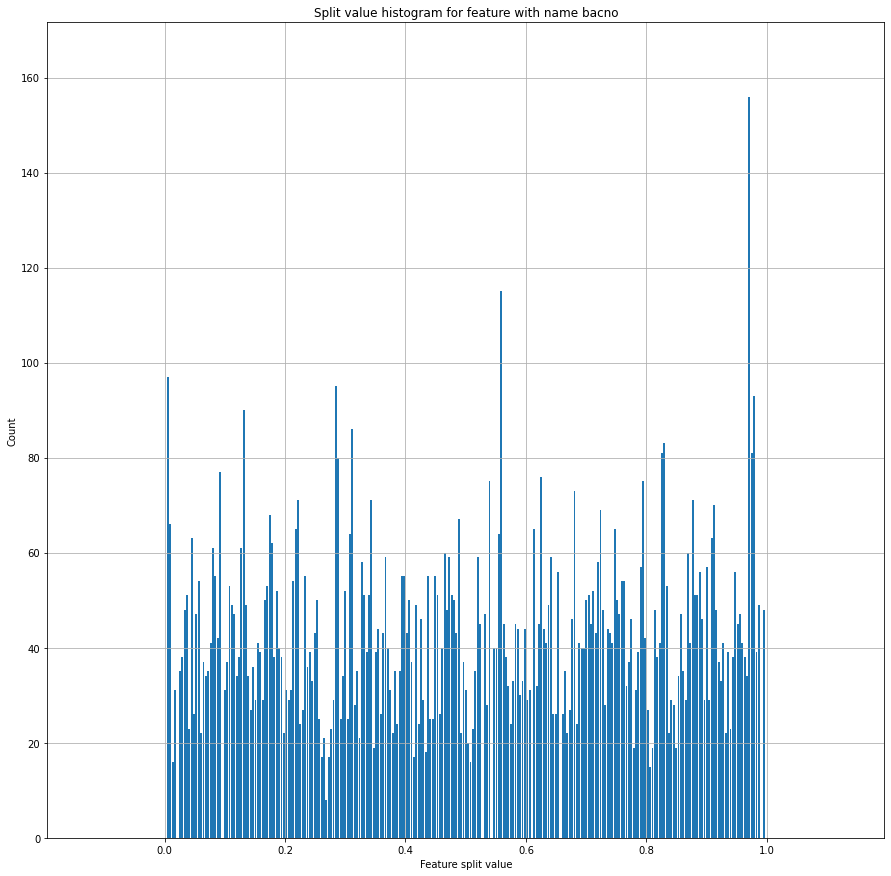

In [12]:
lgb.plot_split_value_histogram(train_results,feature='bacno',figsize=(15,15))

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

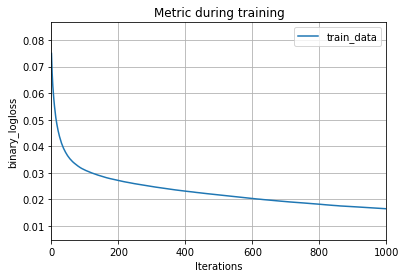

In [13]:
lgb.plot_metric(eval_results)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

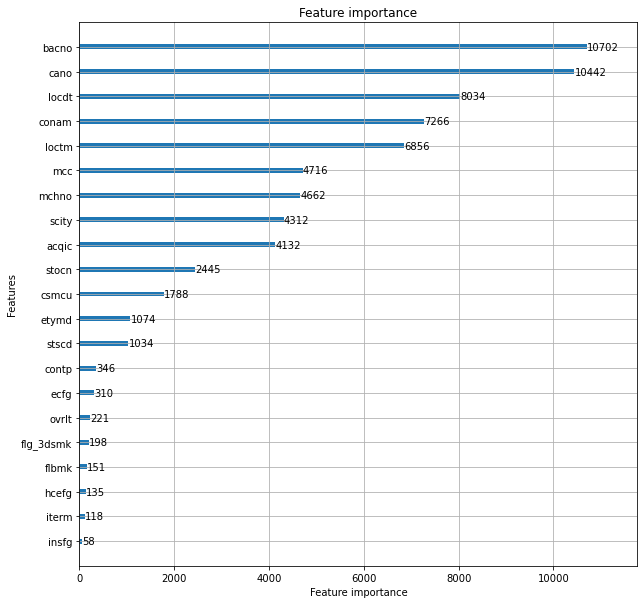

In [14]:
lgb.plot_importance(train_results,figsize=(10,10))

<AxesSubplot:>

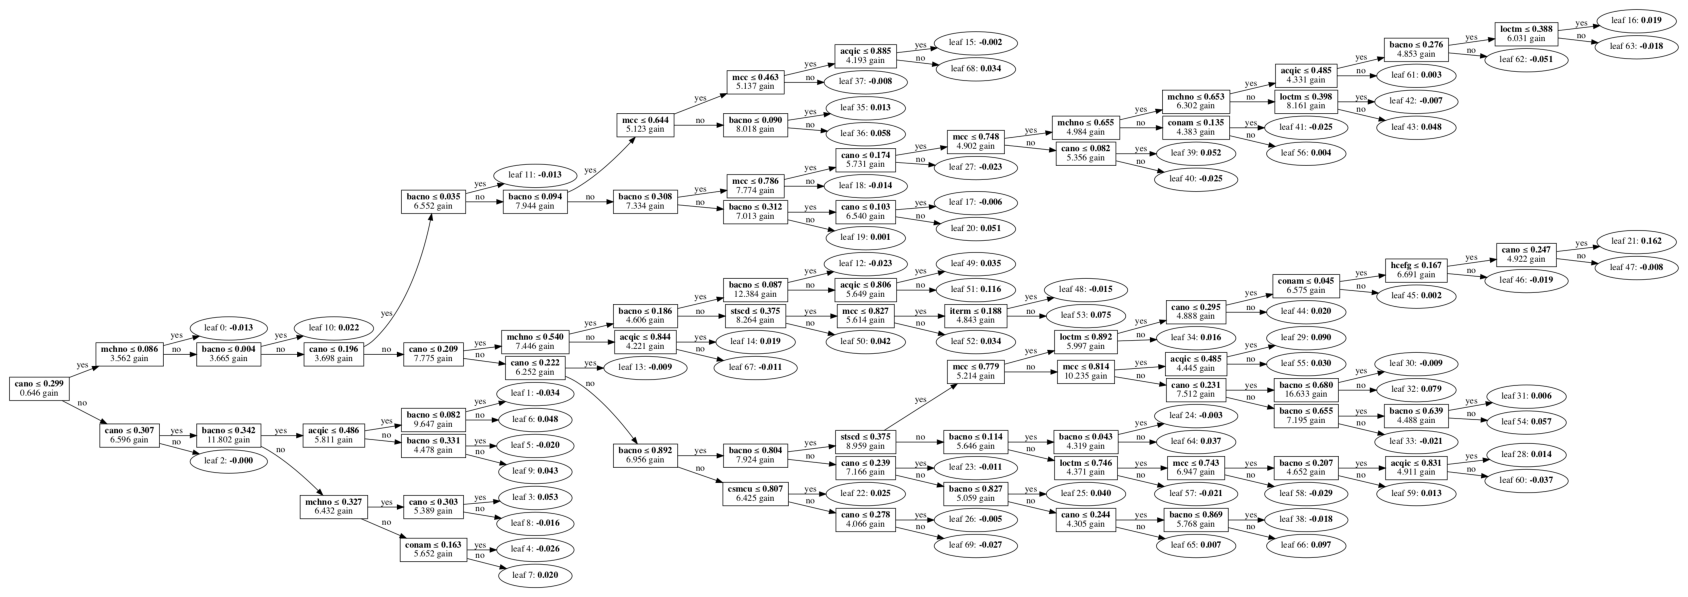

In [15]:
lgb.plot_tree(train_results,figsize=(30,30),tree_index=600,show_info='split_gain')

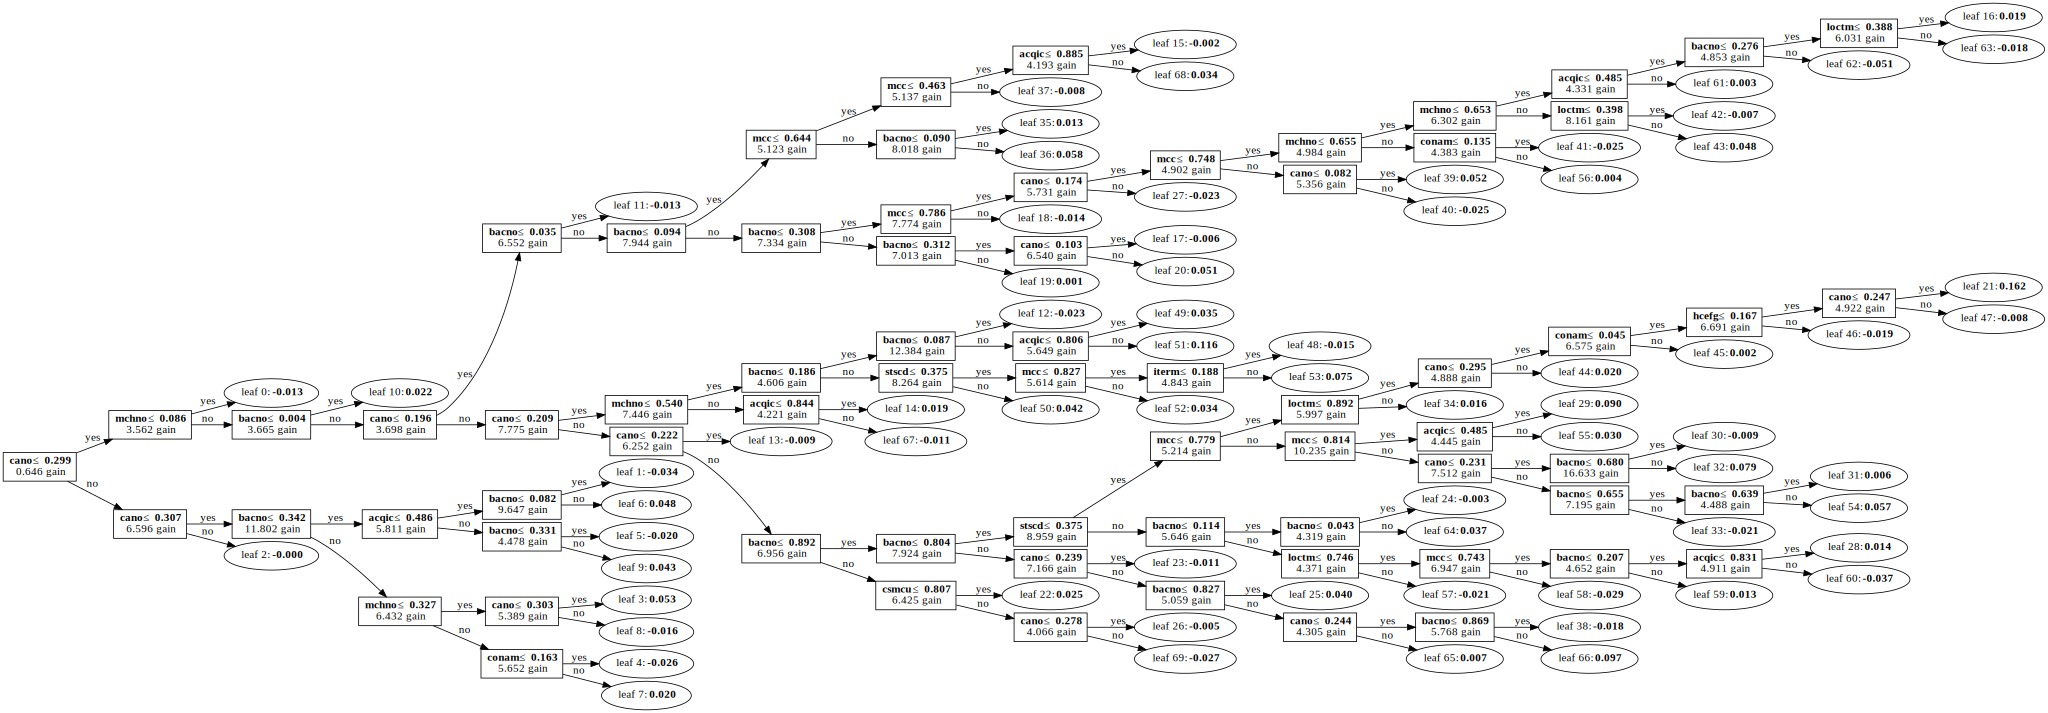

In [16]:
lgb.create_tree_digraph(train_results, tree_index=600, show_info='split_gain')

# Validation

In [17]:
def f_score_cal(labels, preds):
    ((TN, FP), (FN, TP)) = confusion_matrix(labels, preds, labels=[0, 1])
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f_score = 2 * (precision * recall) / (precision + recall)
    return f_score

# Testing

In [18]:
import pickle

with open("../preprocessor.pkt", "rb") as f:
    preprocessor = pickle.load(f)

raw_test_data = pd.read_csv("test.csv")
def preprocess_test_data(raw_test_data):
    labels = raw_test_data["fraud_ind"]
    df = raw_test_data.drop(["fraud_ind", "txkey"], 1)
    df = df.fillna("NA")
    
    for c in df.keys():
        if not (df[c].dtype == np.int64 or df[c].dtype == np.float64):
            df.loc[:,c] = preprocessor['les'][c].transform(df.loc[:,c])
    
    x = preprocessor['scaler'].transform(df)
    df = pd.DataFrame(data=x, index=df.index, columns=df.columns)
    df = pd.DataFrame(preprocessor['mms'].transform(df.values), index=df.index, columns=df.columns)
    
    df["fraud_ind"] = labels
    
    return df

test_data = preprocess_test_data(raw_test_data)
x_test, y_test = test_data.drop(["fraud_ind"], 1), test_data['fraud_ind']
x_test, y_test 

(           acqic     bacno      cano     conam     contp     csmcu  ecfg  \
 0       0.000000  0.820750  0.214335  0.064591  0.833333  0.000000   0.0   
 1       0.000000  0.478244  0.010758  0.064591  0.833333  0.000000   0.0   
 2       0.000000  0.921712  0.926955  0.064591  0.833333  0.000000   0.0   
 3       0.975596  0.920693  0.021286  0.129053  0.833333  0.826667   0.0   
 4       0.999709  0.673377  0.625451  0.000000  0.833333  0.000000   0.0   
 ...          ...       ...       ...       ...       ...       ...   ...   
 380442  0.811737  0.581195  0.525191  0.000191  0.833333  1.000000   1.0   
 380443  0.902818  0.523361  0.794777  0.084510  0.833333  1.000000   1.0   
 380444  0.905142  0.852602  0.787624  0.079675  0.833333  1.000000   0.0   
 380445  0.876235  0.277057  0.925591  0.000191  0.833333  1.000000   1.0   
 380446  0.975596  0.297297  0.827060  0.056402  0.833333  1.000000   0.0   
 
         etymd  flbmk  flg_3dsmk  ...  insfg  iterm     locdt     loctm  \

In [20]:
predict = train_results.predict(x_test)

In [21]:
test_predict = (predict > 0.31).astype(np.int32)

In [22]:
f_score_cal(y_test, test_predict)

0.7194512493875551